In [4]:
import pymysql
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [6]:
db = pymysql.connect("localhost", "root", "19980312", "hyper_simulation")
cursor = db.cursor()
inputFile = input("input file number: ")
matrixNum = input("matrix number: ")
iterationNum = int(input("number of iterations: "))

meanArr = []
stdArr = []

# for t in range(1, 2):
for i in range(0, iterationNum):
    cursor.execute("SELECT fitness from fitness " +
                   "where iteration=" + str(i) +
#                        " and times=" + str(t) +
                   " and firmId!=" + str(-1) +
                   " and inputFile='in" + inputFile + ".conf'" +
                   " and matrix='matrix"+matrixNum+"'")
    row = numpy.array(cursor.fetchall())
    mean = numpy.mean(row)
    std = numpy.std(row)
    meanArr.append(mean)
    stdArr.append(std)
    print(mean, std)
    
result = {'iteration': range(0, iterationNum),
          'fitness': meanArr,
          'errorBar': stdArr}
df = pd.DataFrame(result)
db.close()


input file number: 1
matrix number: 0
number of iterations: 5
0.2782748624327169 0.055659410787296394
0.3582559969303299 0.064195190244739
0.40837065724105714 0.07344224028959843
0.4580641527883861 0.07427559460794222
0.513602003815066 0.07240731239106372


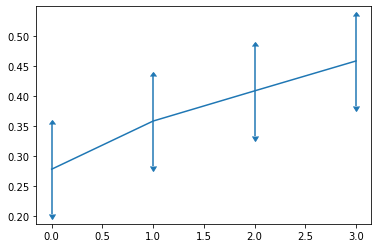

In [27]:
plt.errorbar(df.iteration, df.fitness, yerr=df.errorBar,uplims=True, lolims=True)
plt.show()

In [28]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pymysql
import pandas as pd

db = pymysql.connect("localhost", "root", "19980312", "hyper_simulation")
cursor = db.cursor()
inputFile = input("input file number: ")
matrixNum = input("matrix number: ")

meanArr = []
stdArr = []
collect = [{}, {}, {}, {}, {}]

countArr = ["Exp", "Add", "Drop", "Borrow", "Switch"]
for j in range(0, 5):
    cursor.execute("SELECT count"+countArr[j]+" from count " +
                   "where inputFile='in" + inputFile + ".conf'" +
                   " and matrix='matrix"+matrixNum+"'")
    tempRow = cursor.fetchall()
    row = numpy.array(tempRow)
    mean = numpy.mean(row)
    std = numpy.std(row)
    meanArr.append(mean)
    stdArr.append(std)
    for r in tempRow:
        k = r[0]
        if k in collect[j].keys():
            collect[j][k] = collect[j][k] + 1
        else:
            collect[j][k] = 1
    
result = {'avg': meanArr,
          'std': stdArr}
df = pd.DataFrame(result)
print(df)
db.close()

fig, axs = plt.subplots(1, 5, figsize=(15, 3), sharey=True)

for j in range(0, 5):
    x,y = [],[]
    for k in sorted(collect[j].keys()):
        x.append(k)
        y.append(collect[j][k])
    axs[j].fill_between(x, 0, y)
    axs[j].plot(x,y)
    
plt.show()

input file number: 1
matrix number: 0
{0: 22, 3: 6, 2: 28, 1: 24}


input file number: 2
matrix number: 0
     avg       std
0  1.650  0.963068
1  4.100  0.860233
2  0.000  0.000000
3  0.875  0.780625
4  0.175  0.379967
[0, 0, 0, 0, 0]
[8, 28, 32, 8, 4]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

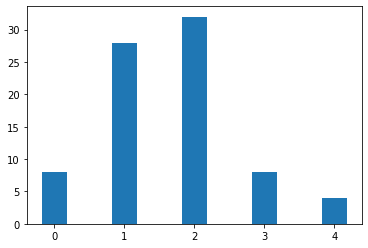

In [16]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pymysql
import pandas as pd
import copy

db = pymysql.connect("localhost", "root", "19980312", "hyper_simulation")
cursor = db.cursor()
inputFile = input("input file number: ")
matrixNum = input("matrix number: ")

meanArr = []
stdArr = []
collect = [{}, {}, {}, {}, {}]

countArr = ["Exp", "Add", "Drop", "Borrow", "Switch"]
for j in range(0, 5):
    cursor.execute("SELECT count"+countArr[j]+" from count " +
                   "where inputFile='in" + inputFile + ".conf'" +
                   " and matrix='matrix"+matrixNum+"'")
    tempRow = cursor.fetchall()
    row = numpy.array(tempRow)
    mean = numpy.mean(row)
    std = numpy.std(row)
    meanArr.append(mean)
    stdArr.append(std)
    for r in tempRow:
        k = r[0]
        if k in collect[j].keys():
            collect[j][k] = collect[j][k] + 1
        else:
            collect[j][k] = 1
    
result = {'avg': meanArr,
          'std': stdArr}
df = pd.DataFrame(result)
print(df)
db.close()

width=0.35
previousY = [0,0,0,0,0]

for j in range(0, 5):
    x,y = [],[]
    for k in sorted(collect[j].keys()):
        x.append(k)
        y.append(collect[j][k])
    plt.bar(x, y, width, bottom=previousY, label=countArr[j])
    previousY = y
        
plt.show()

In [52]:
import matplotlib.pyplot as plt
import numpy 
import pymysql
import pandas as pd

inputFile = ['1', '2']
firms = range(0, 20)
iterationNum = 5
matrixNum = '0'
db = pymysql.connect("localhost", "root", "19980312", "hyper_simulation")
cursor = db.cursor()
for f in inputFile:
    meanArr = []
    stdArr = []
    cursor.execute("SELECT times, firmId, iteration, firmRank from fitness " +
                   "where firmId!=-1" +
                   " and inputFile='in" + f + ".conf'" +
                   " and matrix='matrix" + matrixNum + "'")
    df = pd.DataFrame(cursor.fetchall(),columns=['times', 'firmId','iteration','firmRank'])
    print(df)
#     for firm in firms:
#         print('input='+f,'firm='+str(firm))
#         firmDf = df.loc[(df.firmId == firm) & (df.iteration == 0)].sort_values('times').drop_duplicates() 
#         tempMeanArr = []
#         tempStdArr = []
#         previousRow = firmDf.firmRank.to_numpy()
#         for i in range(1, iterationNum):
#             firmDf = df.loc[(df.firmId == firm) & (df.iteration == i)].sort_values('times').drop_duplicates() 
#             curRow = firmDf.firmRank.to_numpy()
#             minusResultRow = numpy.subtract(curRow, previousRow)
#             mean = numpy.mean(minusResultRow)
#             std = numpy.std(minusResultRow)
#             tempMeanArr.append(mean)
#             tempStdArr.append(std)
#             previousRow = curRow
#         meanArr.append(tempMeanArr)
#         stdArr.append(tempStdArr)
#     meanArr = np.mean(np.array(meanArr), axis=0)
#     stdArr = np.std(np.array(stdArr), axis=0)
#     line = plt.errorbar(range(0, iterationNum - 1), meanArr, uplims=True, lolims=True,
#                         label='input=' + f)  # yerr=stdArr,
#     plt.annotate("input=" + f, xy=(6, meanArr[0]), xytext=(6, 0), color=line[0].get_color(),
#                  textcoords="offset points", va="center")
#     # plt.annotate("iteration=" + str(i), xy=(0, meanArr[-1]), xytext=(6, 0), color=line[0].get_color(),
#     #              textcoords="offset points", va="center")

# plt.legend(prop={'size': 10})
# plt.show()

     times  firmId  iteration  firmRank
0        1      19          0         1
1        1       9          0         2
2        1      11          0         3
3        1      12          0         4
4        1       2          0         5
..     ...     ...        ...       ...
395      2      14          4        16
396      2       8          4        17
397      2       4          4        18
398      2       1          4        19
399      2      19          4        20

[400 rows x 4 columns]
     times  firmId  iteration  firmRank
0        1       6          0         1
1        1       5          0         2
2        1       2          0         3
3        1      15          0         4
4        1      14          0         5
..     ...     ...        ...       ...
395      2       1          4        16
396      2      18          4        17
397      2       7          4        18
398      2      11          4        19
399      2      14          4        20

[400 rows x 4 c

In [33]:
a = np.array([[1, 2.5], [3.2, 4]])
print(a)
print(np.mean(a, axis=0))

[[1.  2.5]
 [3.2 4. ]]
[2.1  3.25]
